# Tips



### Importamos nuestras librerias
### cargamos el dataset y limipiamos columnas malas

In [1]:
import pandas as pd

# cargamos las librerias gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# mostramos las figuras en el notebook
%matplotlib inline

# seteamos seaborn al default (cambia cuestiones estéticas en las figuras)
sns.set()
plt.rcParams['figure.figsize'] = [15, 10]
#cargamos el dataset y limpiamos 
tips = pd.read_csv('tips.csv')

print(tips.head())

   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
# Limpiamos la columna Unnamed
tips.drop('Unnamed: 0', axis=1, inplace=True)
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Veamos algunos ejemplos de gráficos que podemos hacer con seaborn:
#### distplot

[Text(0, 0.5, 'Ocurrencias'),
 Text(0.5, 0, 'Cuanto gasté'),
 Text(0.5, 1.0, 'Gasto Total')]

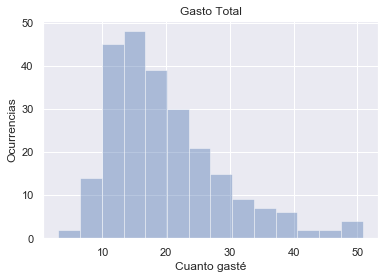

In [3]:
# distplot nos crea un histograma de la columna que elijamos
gasto = sns.distplot(tips.total_bill, kde=False);

# y usando la función set sobre el histrograma de gasto
gasto.set(xlabel = 'Cuanto gasté', ylabel = 'Ocurrencias', title = "Gasto Total")

#### joinplot

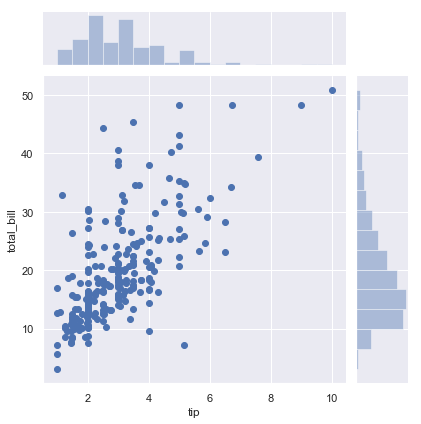

In [4]:
# el joinplot es como un distplot que nos permite hacer dos histogramas a la vez
sns.jointplot(x ="tip", y ="total_bill", data = tips)

#### pairplot

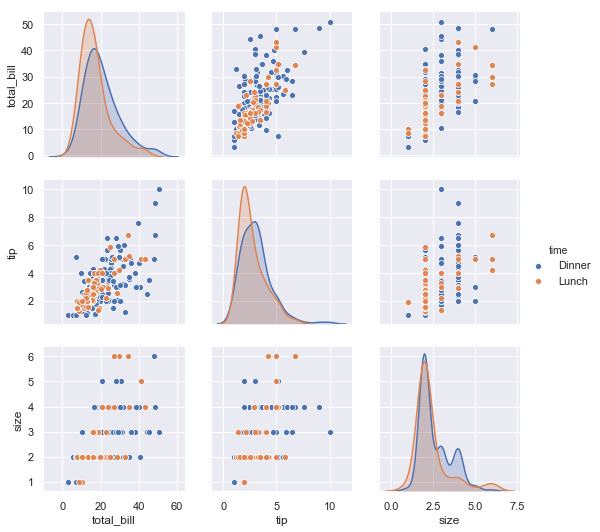

In [5]:
# pairplot genera figuras en 2d con pares de datos (numéricos) de la tabla
sns.pairplot(tips, hue='time')

### Ahora Jueguen ustedes para generar gráficos que describan:

    
 1. Relacion entre gasto total y día de la semana
    
 2. Propina en funcion de del dia de la semana, distinguiendo el género del consumidor
    
 3.  Generar histogramas para el gasto total (por un lado) y propina (por otro) separando en momento del día
    
 4. Generar una figura que considere condición de fumador y género al mismo tiempo

<b>
    
Ademas de las Funciones que están arriba, también pueden resultarles útiles:

sns.stripplot

sns.boxplot

sns.FacetGrid

Y lo mas util de todo:
</b>
    
## Google!

### 1. Gasto en función del día de la semana

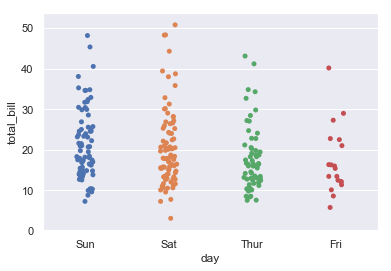

In [6]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

### 2. Propina según el día de la semana, distinguiendo por sexo

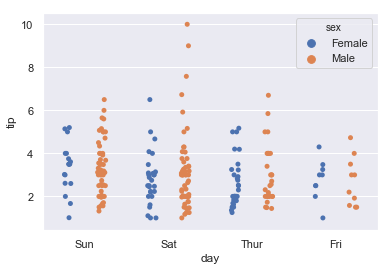

In [7]:
sns.stripplot(x = "day", y = "tip", hue = "sex", data = tips, dodge=True, jitter = True);

### 3.  Propina media, distinguiendo por día y momento del día

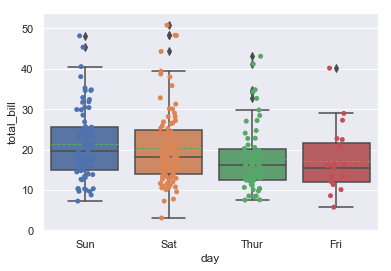

In [8]:
sns.boxplot(x = "day", y = "total_bill", data = tips, showmeans=True, meanline=True)
sns.stripplot(x = "day", y = "total_bill", data = tips)

### 4. Histogramas del gasto total y la propina para cada momento del día

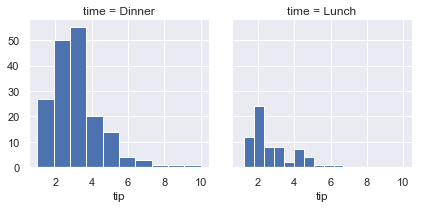

In [9]:
# Genera un FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

### 5 Dos scatterplots separados por genero y distinguiendo condición de fumador

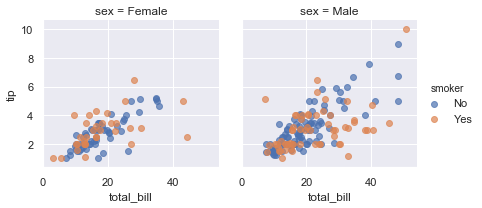

In [10]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();

# Ahora, con estadisticas sobre hundimiento del titanic, busquen relaciones entre supervivencia y otras columnas

In [11]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Distribución de edad en función del genero y si sobrevivieron

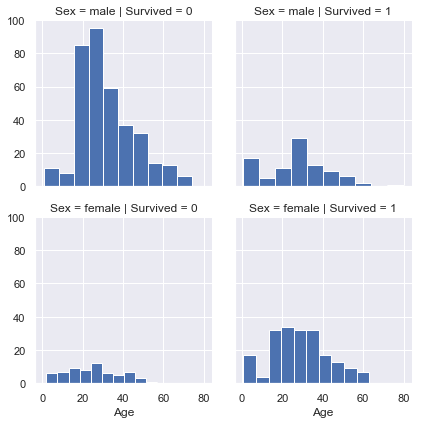

In [12]:
FG = sns.FacetGrid(titanic, col = "Survived", row="Sex")
FG.map(plt.hist, "Age")

In [13]:
### Cantidad de sobrevivientes por género

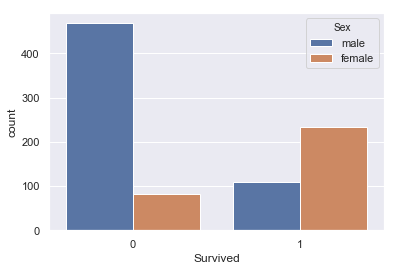

In [14]:
sns.countplot(x="Survived", hue="Sex", data=titanic)

### Estadísticas de precio pagado según si se salvaron

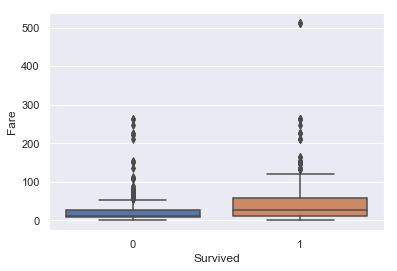

In [15]:
sns.boxplot(x = "Survived", y = "Fare", data = titanic)

In [16]:
### comparación de sobrevivientes según lugar de embarcación

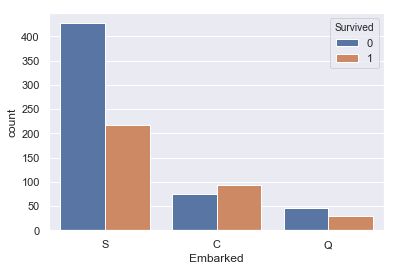

In [17]:
sns.countplot(x = "Embarked", hue = "Survived", data = titanic)

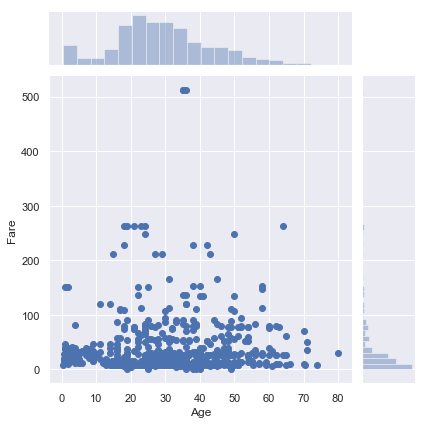

In [18]:
sns.jointplot(x ="Age", y ="Fare", data = titanic)